<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n20.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.518496,73.020464,81.797138,-0.000058,203.336041,203.336098,-0.000057
1,0.0,1.0,74.834233,26.987203,88.425294,0.000251,200.246981,200.246983,-0.000001
2,0.0,2.0,69.737132,91.549165,34.362074,0.000011,205.648382,205.648333,0.000049
3,0.0,3.0,74.066212,49.446263,40.653426,-0.000138,174.165762,174.166069,-0.000307
4,0.0,4.0,25.663668,93.023835,60.925630,-0.000018,189.613116,189.613036,0.000080
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,90.868622,21.587583,55.681516,0.000270,178.137991,178.137869,0.000122
29996,999.0,26.0,74.443223,60.638810,27.656622,-0.000078,172.738578,172.738641,-0.000064
29997,999.0,27.0,65.673714,27.979584,87.091855,0.000562,190.745714,190.745346,0.000368
29998,999.0,28.0,86.799032,91.068820,37.834449,0.000006,225.702308,225.702206,0.000102


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.518496,73.020464,81.797138,-0.000058,203.336041,203.336098,-0.000057
1,0.0,1.0,74.834233,26.987203,88.425294,0.000251,200.246981,200.246983,-0.000001
2,0.0,2.0,69.737132,91.549165,34.362074,0.000011,205.648382,205.648333,0.000049
3,0.0,3.0,74.066212,49.446263,40.653426,-0.000138,174.165762,174.166069,-0.000307
4,0.0,4.0,25.663668,93.023835,60.925630,-0.000018,189.613116,189.613036,0.000080
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,90.868622,21.587583,55.681516,0.000270,178.137991,178.137869,0.000122
29996,999.0,26.0,74.443223,60.638810,27.656622,-0.000078,172.738578,172.738641,-0.000064
29997,999.0,27.0,65.673714,27.979584,87.091855,0.000562,190.745714,190.745346,0.000368
29998,999.0,28.0,86.799032,91.068820,37.834449,0.000006,225.702308,225.702206,0.000102


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.518496  73.020464  81.797138  ...  203.336041  203.336098 -0.000057
      1.0    74.834233  26.987203  88.425294  ...  200.246981  200.246983 -0.000001
      2.0    69.737132  91.549165  34.362074  ...  205.648382  205.648333  0.000049
      3.0    74.066212  49.446263  40.653426  ...  174.165762  174.166069 -0.000307
      4.0    25.663668  93.023835  60.925630  ...  189.613116  189.613036  0.000080
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   90.868622  21.587583  55.681516  ...  178.137991  178.137869  0.000122
      26.0   74.443223  60.638810  27.656622  ...  172.738578  172.738641 -0.000064
      27.0   65.673714  27.979584  87.091855  ...  190.745714  190.745346  0.000368
      28.0   86.799032  91.068820  37.834449  ...  225.702308  225.702206  0.000102
      29.0   41.328270  69.965740  43.959495  ...  165.253547  165.253505  0.000042

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.518496  73.020464  81.797138  ...  203.336041  203.336098 -0.000057
      1.0    74.834233  26.987203  88.425294  ...  200.246981  200.246983 -0.000001
      2.0    69.737132  91.549165  34.362074  ...  205.648382  205.648333  0.000049
      3.0    74.066212  49.446263  40.653426  ...  174.165762  174.166069 -0.000307
      4.0    25.663668  93.023835  60.925630  ...  189.613116  189.613036  0.000080
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   90.868622  21.587583  55.681516  ...  178.137991  178.137869  0.000122
      26.0   74.443223  60.638810  27.656622  ...  172.738578  172.738641 -0.000064
      27.0   65.673714  27.979584  87.091855  ...  190.745714  190.745346  0.000368
      28.0   86.799032  91.068820  37.834449  ...  225.702308  225.702206  0.000102
      29.0   41.328270  69.965740  43.959495  ...  165.253547  165.253505  0.000042

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.518496,73.020464,81.797138,-0.000058,203.336041,203.336098,-0.000057
1,0.0,1.0,74.834233,26.987203,88.425294,0.000251,200.246981,200.246983,-0.000001
2,0.0,2.0,69.737132,91.549165,34.362074,0.000011,205.648382,205.648333,0.000049
3,0.0,3.0,74.066212,49.446263,40.653426,-0.000138,174.165762,174.166069,-0.000307
4,0.0,4.0,25.663668,93.023835,60.925630,-0.000018,189.613116,189.613036,0.000080
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,90.868622,21.587583,55.681516,0.000270,178.137991,178.137869,0.000122
29996,999.0,26.0,74.443223,60.638810,27.656622,-0.000078,172.738578,172.738641,-0.000064
29997,999.0,27.0,65.673714,27.979584,87.091855,0.000562,190.745714,190.745346,0.000368
29998,999.0,28.0,86.799032,91.068820,37.834449,0.000006,225.702308,225.702206,0.000102


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.518496  73.020464  81.797138  ...  203.336041  203.336098 -0.000057
      1.0    74.834233  26.987203  88.425294  ...  200.246981  200.246983 -0.000001
      2.0    69.737132  91.549165  34.362074  ...  205.648382  205.648333  0.000049
      3.0    74.066212  49.446263  40.653426  ...  174.165762  174.166069 -0.000307
      4.0    25.663668  93.023835  60.925630  ...  189.613116  189.613036  0.000080
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   90.868622  21.587583  55.681516  ...  178.137991  178.137869  0.000122
      26.0   74.443223  60.638810  27.656622  ...  172.738578  172.738641 -0.000064
      27.0   65.673714  27.979584  87.091855  ...  190.745714  190.745346  0.000368
      28.0   86.799032  91.068820  37.834449  ...  225.702308  225.702206  0.000102
      29.0   41.328270  69.965740  43.959495  ...  165.253547  165.253505  0.000042

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

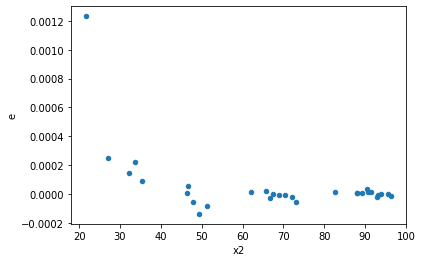

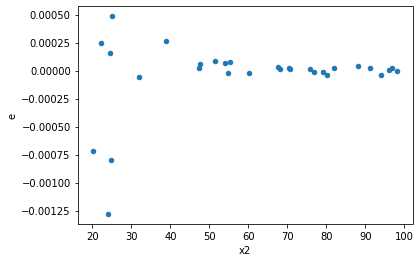

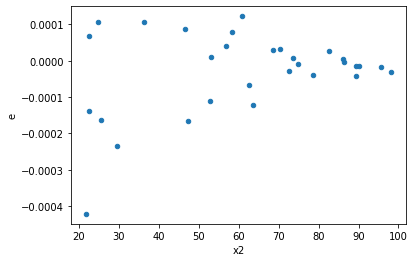

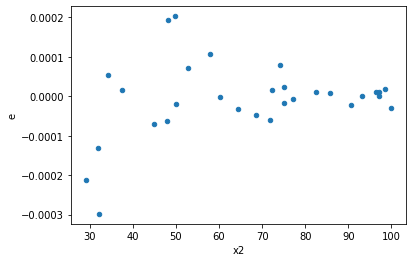

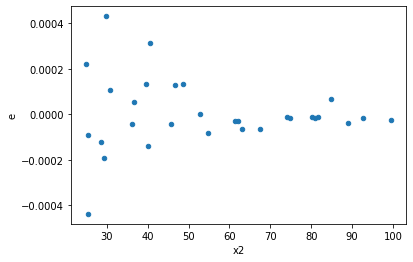

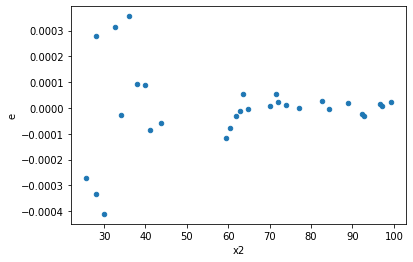

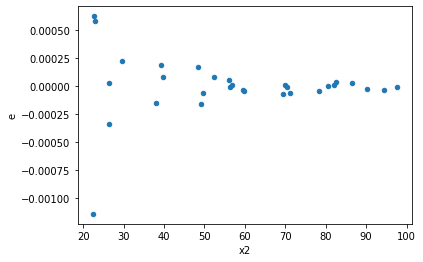

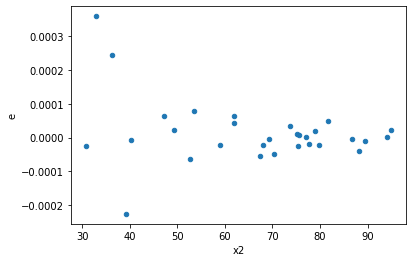

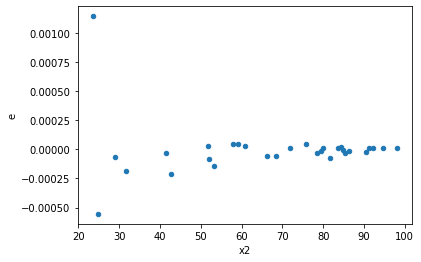

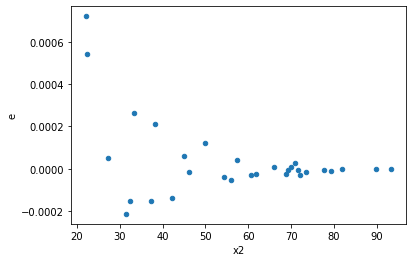

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,6.809932136272867e-10,7.080786111710643e-07,8.512415170341084e-11,8.850982639638304e-08,0.00096174803599987,3.489404779951587e-12,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,4.642396419377548e-09,2.4593232658738135e-06,5.802995524221935e-10,3.074154082342267e-07,0.0018876723055470607,7.205908044715124e-11,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,3.779057583408891e-09,2.2945504651455488e-07,4.723821979261113e-10,2.868188081431936e-08,0.016469707861357392,1.1090143498574342e-06,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,1.4544034329786816e-09,6.855778486511361e-08,1.818004291223352e-10,8.569723108139202e-09,0.021214271083002435,3.348205911183784e-06,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,8.785706280561682e-09,3.280445224787437e-07,1.0982132850702102e-09,4.1005565309842965e-08,0.026782054503382138,9.181963780133624e-06,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,4.048142179791997e-09,6.814932046743716e-07,5.060177724739997e-10,8.518665058429645e-08,0.0059401064486420884,1.2167149489827341e-08,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,6.812564166596846e-09,1.8062706404020272e-06,8.515705208246057e-10,2.257838300502534e-07,0.003771618723249885,1.6009871544441188e-09,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,6.246174115457252e-09,1.2346142545866188e-07,7.807717644321565e-10,1.5432678182332736e-08,0.05059211079292645,0.00013582413108783375,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,5.945098934840621e-09,1.3819668984397645e-06,7.431373668550777e-10,1.7274586230497057e-07,0.004301911240821047,2.8827099445483866e-09,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    997
Reject005=1 : Homoscedasticity        3
Name: Result_test, dtype: int64